In [1]:
### A. DATA INGESTION & CLEANING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

# Column names based on the 'adult.names' file

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load the data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)
df.columns = df.columns.str.replace('-', '_')
# Show first 5 rows
print("🔹 Preview of the dataset:")
display(df.head())

🔹 Preview of the dataset:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Basic structure and overview
print(f"🔹 Shape of dataset: {df.shape}")
print(f"🔹 Number of columns: {df.shape[1]}")
print(f"🔹 Number of rows: {df.shape[0]}")

🔹 Shape of dataset: (32561, 15)
🔹 Number of columns: 15
🔹 Number of rows: 32561


In [4]:
data_quality = pd.DataFrame({
    'Non-Null Count': df.count(),
    'Missing Count': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100,
    'Cardinality': df.nunique(),
    'Duplicated (Total Rows)': df.duplicated().sum(),
    'Dtype': df.dtypes,
    '% Unique': df.nunique() / df.shape[0] * 100,
    'Memory (MB)': df.memory_usage(deep=True) / (1024**2)
})

pd.set_option('display.max_rows', None)  # Optional: display all rows if needed
display(data_quality.sort_values(by='Missing %', ascending=False))

,Non-Null Count,Missing Count,Missing %,Cardinality,Duplicated (Total Rows),Dtype,% Unique,Memory (MB)
age,32561.0,0.0,0.0,73.0,24,int64,0.224195,0.248421
capital_gain,32561.0,0.0,0.0,119.0,24,int64,0.365468,0.248421
capital_loss,32561.0,0.0,0.0,92.0,24,int64,0.282547,0.248421
education,32561.0,0.0,0.0,16.0,24,object,0.049139,1.783465
education_num,32561.0,0.0,0.0,16.0,24,int64,0.049139,0.248421
fnlwgt,32561.0,0.0,0.0,21648.0,24,int64,66.484445,0.248421
hours_per_week,32561.0,0.0,0.0,94.0,24,int64,0.288689,0.248421
income,32561.0,0.0,0.0,2.0,24,object,0.006142,1.669362
marital_status,32561.0,0.0,0.0,7.0,24,object,0.021498,1.969171
native_country,32561.0,0.0,0.0,42.0,24,object,0.128989,1.903333


In [5]:
# ---------------------------------------------
# Handling Duplicate Rows (if any)
# ---------------------------------------------
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"\n⚠️ Found {num_duplicates} duplicate rows. Removing them...")
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New shape: {df.shape}")
else:
    print("\n✅ No duplicate rows found.")


⚠️ Found 24 duplicate rows. Removing them...
✅ Duplicates removed. New shape: (32537, 15)


In [6]:
# Identify feature types
numerical_feature = [col for col in df.columns if df[col].dtypes != 'O']
discrete_feature = [col for col in numerical_feature if df[col].nunique() < 25]
continuous_feature = [col for col in numerical_feature if col not in discrete_feature]
categorical_feature = [col for col in df.columns if col not in numerical_feature]

print(f"\n🔹 Numerical Features Count: {len(numerical_feature)}")
print(f"🔹 Discrete Numerical Features Count: {len(discrete_feature)}")
print(f"🔹 Continuous Numerical Features Count: {len(continuous_feature)}")
print(f"🔹 Categorical Features Count: {len(categorical_feature)}")


🔹 Numerical Features Count: 6
🔹 Discrete Numerical Features Count: 1
🔹 Continuous Numerical Features Count: 5
🔹 Categorical Features Count: 9


In [7]:
# Summary statistics for numerical columns
print("\n🔹 Summary statistics:")
display(df.describe())


🔹 Summary statistics:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.columns = df.columns.str.replace('-', '_')

In [9]:
### Checking Unique Value in Each Column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: age
Unique Values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Number of Unique Values: 73

Column: workclass
Unique Values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Number of Unique Values: 9

Column: fnlwgt
Unique Values: [ 77516  83311 215646 ...  34066  84661 257302]
Number of Unique Values: 21648

Column: education
Unique Values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Number of Unique Values: 16

Column: education_num
Unique Values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Number of Unique Values: 16

Column: marital_status
Unique Values: ['Never-married' 'Married-civ-spouse' 'Divor

In [10]:
### Section B: Exploratory Data Analysis (EDA)

In [11]:
### 1.Class Imbalance Analysis

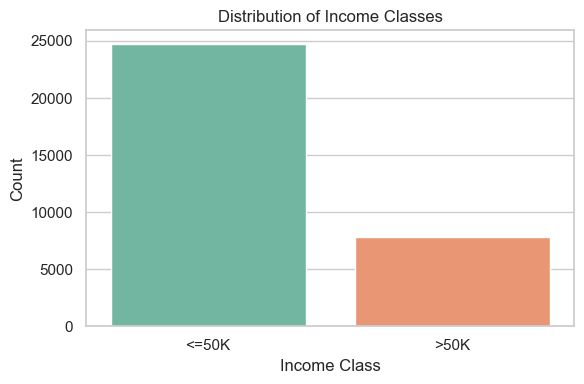


📊 Class Distribution Summary:


,Count,Percentage (%)
income,,
<=50K,24698,75.91
>50K,7839,24.09


📌 Insight (class imbalance):
→ The dataset is imbalanced: 75.91% '<=50K' vs 24.09% '>50K'.
→ Class imbalance may bias models toward the majority class and lead to poor recall on minority class.
→ Resampling techniques (e.g., SMOTE, class weighting, stratified sampling) may be required.


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='income', palette='Set2')
plt.title("Distribution of Income Classes")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Absolute counts and percentages
counts = df['income'].value_counts()
percentages = df['income'].value_counts(normalize=True) * 100

# Combine into a DataFrame for clarity
class_summary = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})
print("\n📊 Class Distribution Summary:")
display(class_summary)

# 🔍 Insight block (class imbalance)
print("📌 Insight (class imbalance):")
if percentages.max() > 60:
    print("→ The dataset is imbalanced: {:.2f}% '{}' vs {:.2f}% '{}'.".format(
        percentages.max(), percentages.idxmax(), percentages.min(), percentages.idxmin()
    ))
    print("→ Class imbalance may bias models toward the majority class and lead to poor recall on minority class.")
    print("→ Resampling techniques (e.g., SMOTE, class weighting, stratified sampling) may be required.")
else:
    print("→ The classes are relatively balanced, which reduces the risk of model bias toward any particular group.")


In [13]:
### 2. Categorical Features vs Target
### Let’s analyze education and marital-status with respect to income:

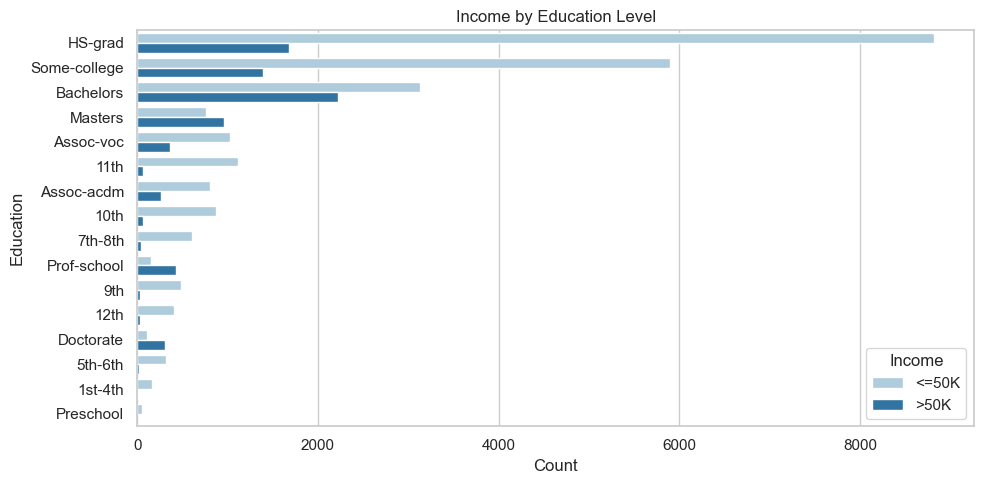

📌 Insight: Education vs Income


income,<=50K,>50K
education,,
Doctorate,25.91%,74.09%
Prof-school,26.56%,73.44%
Masters,44.31%,55.69%
Bachelors,58.51%,41.49%
Assoc-voc,73.88%,26.12%
Assoc-acdm,75.16%,24.84%
Some-college,80.97%,19.03%
HS-grad,84.05%,15.95%
12th,92.38%,7.62%


→ Individuals with higher education levels (e.g., 'Doctorate', 'Masters', 'Bachelors') show a significantly higher proportion of >50K income.
→ Conversely, lower education groups like 'Preschool' and 'HS-grad' mostly fall into the <=50K income category.
→ Education is likely a strong predictor of income and should be retained.


In [14]:
# Education vs Income
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='education', hue='income', palette='Paired', order=df['education'].value_counts().index)
plt.title("Income by Education Level")
plt.xlabel("Count")
plt.ylabel("Education")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

# Insight block
print("📌 Insight: Education vs Income")
edu_income_ratio = df.groupby('education')['income'].value_counts(normalize=True).unstack().fillna(0).sort_values('>50K', ascending=False)
display(edu_income_ratio.style.format("{:.2%}"))

print("→ Individuals with higher education levels (e.g., 'Doctorate', 'Masters', 'Bachelors') show a significantly higher proportion of >50K income.")
print("→ Conversely, lower education groups like 'Preschool' and 'HS-grad' mostly fall into the <=50K income category.")
print("→ Education is likely a strong predictor of income and should be retained.")

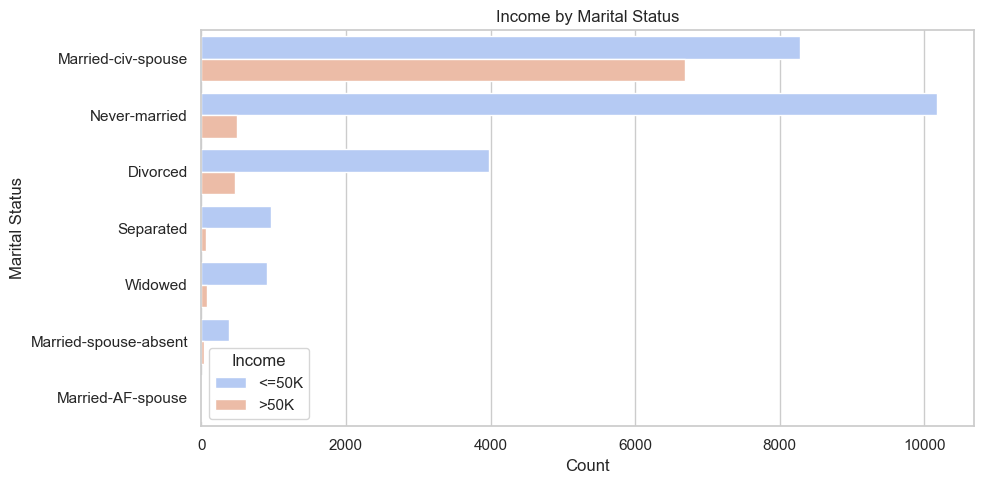

📌 Insight: Marital Status vs Income


income,<=50K,>50K
marital_status,,
Married-civ-spouse,55.31%,44.69%
Married-AF-spouse,56.52%,43.48%
Divorced,89.57%,10.43%
Widowed,91.44%,8.56%
Married-spouse-absent,91.87%,8.13%
Separated,93.56%,6.44%
Never-married,95.40%,4.60%


→ 'Married-civ-spouse' individuals have the highest >50K income ratio, suggesting financial advantage in dual-income households.
→ Categories like 'Never-married', 'Divorced', or 'Separated' are more skewed toward <=50K.
→ Marital status likely reflects financial stability and could be valuable for income prediction.


In [15]:
# Marital-status vs Income
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='marital_status', hue='income', palette='coolwarm', order=df['marital_status'].value_counts().index)
plt.title("Income by Marital Status")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

# Insight block
print("📌 Insight: Marital Status vs Income")
marital_income_ratio = df.groupby('marital_status')['income'].value_counts(normalize=True).unstack().fillna(0).sort_values('>50K', ascending=False)
display(marital_income_ratio.style.format("{:.2%}"))

print("→ 'Married-civ-spouse' individuals have the highest >50K income ratio, suggesting financial advantage in dual-income households.")
print("→ Categories like 'Never-married', 'Divorced', or 'Separated' are more skewed toward <=50K.")
print("→ Marital status likely reflects financial stability and could be valuable for income prediction.")


In [16]:
### 3.Distribution of Numerical Features by Income

In [17]:
### Age Distribution by Income

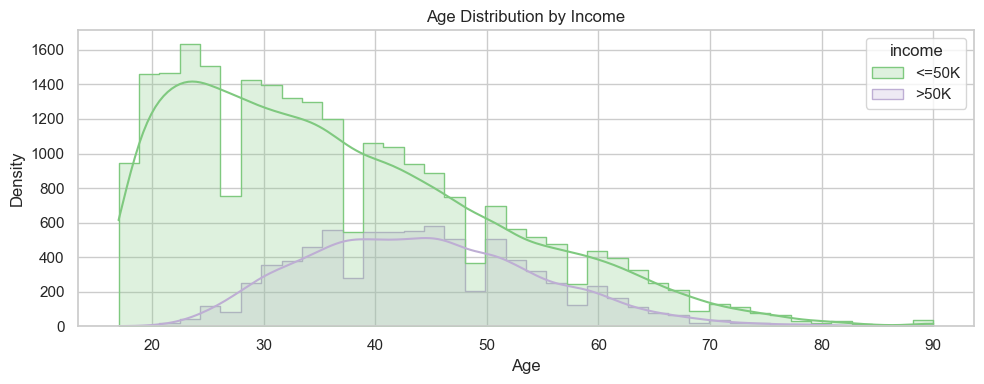

📌 Insight: Age vs Income


,mean,25%,50%,75%
income,,,,
<=50K,36.8,25.0,34.0,46.0
>50K,44.3,36.0,44.0,51.0


→ Individuals earning >50K tend to be older, with a higher median and 75th percentile age compared to those earning <=50K.
→ The peak for <=50K income appears between ages 20–35, while >50K peaks around 40–55.
→ Age clearly contributes predictive value—likely representing experience/seniority.


In [18]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='age', hue='income', kde=True, element='step', palette='Accent', bins=40)
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Insight block
print("📌 Insight: Age vs Income")

age_summary = df.groupby('income')['age'].describe()[['mean', '25%', '50%', '75%']].round(1)
display(age_summary)

print("→ Individuals earning >50K tend to be older, with a higher median and 75th percentile age compared to those earning <=50K.")
print("→ The peak for <=50K income appears between ages 20–35, while >50K peaks around 40–55.")
print("→ Age clearly contributes predictive value—likely representing experience/seniority.")

In [19]:
### Hours-per-Week Distribution by Income

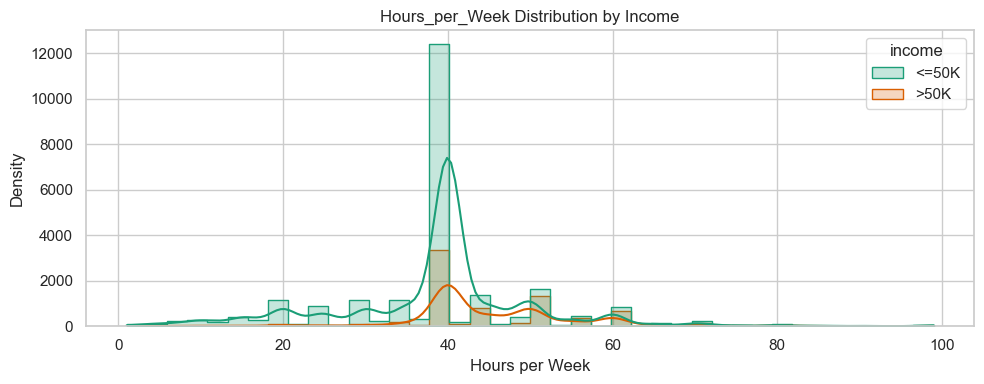

📌 Insight: Working Hours vs Income


,mean,25%,50%,75%
income,,,,
<=50K,38.8,35.0,40.0,40.0
>50K,45.5,40.0,40.0,50.0


→ People with >50K income generally work longer hours; their mean and median hours are visibly higher.
→ Many <=50K earners cluster around standard 40-hour work weeks.
→ Higher hours may correlate with job type, seniority, or motivation—making this a useful feature.


In [20]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='hours_per_week', hue='income', kde=True, element='step', palette='Dark2', bins=40)
plt.title("Hours_per_Week Distribution by Income")
plt.xlabel("Hours per Week")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Insight block
print("📌 Insight: Working Hours vs Income")

hours_summary = df.groupby('income')['hours_per_week'].describe()[['mean', '25%', '50%', '75%']].round(1)
display(hours_summary)

print("→ People with >50K income generally work longer hours; their mean and median hours are visibly higher.")
print("→ Many <=50K earners cluster around standard 40-hour work weeks.")
print("→ Higher hours may correlate with job type, seniority, or motivation—making this a useful feature.")


In [21]:
### b.Age vs Income (Boxplot)

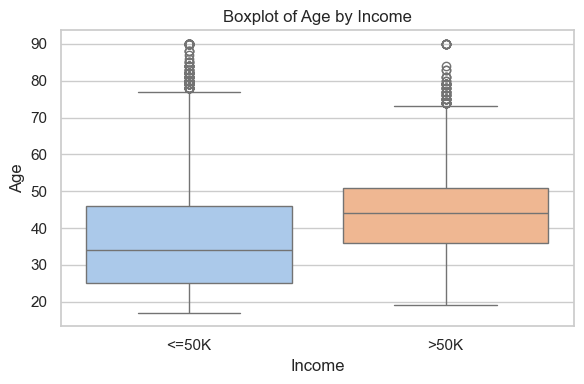

📌 Insight: Age Distribution by Income Class


,mean,25%,50%,75%
income,,,,
<=50K,36.8,25.0,34.0,46.0
>50K,44.3,36.0,44.0,51.0


→ Median age of >50K earners is around 44, while <=50K is about 34.
→ >50K earners have a broader interquartile range and more upper outliers.
→ Strong positive association between age and high income is visible—age can serve as a proxy for experience.


In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='income', y='age', palette='pastel')
plt.title("Boxplot of Age by Income")
plt.xlabel("Income")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# Insight block
print("📌 Insight: Age Distribution by Income Class")

age_stats = df.groupby('income')['age'].describe()[['mean', '25%', '50%', '75%']].round(1)
display(age_stats)

print("→ Median age of >50K earners is around 44, while <=50K is about 34.")
print("→ >50K earners have a broader interquartile range and more upper outliers.")
print("→ Strong positive association between age and high income is visible—age can serve as a proxy for experience.")


In [23]:
### Hours-per-Week vs Income (Boxplot)

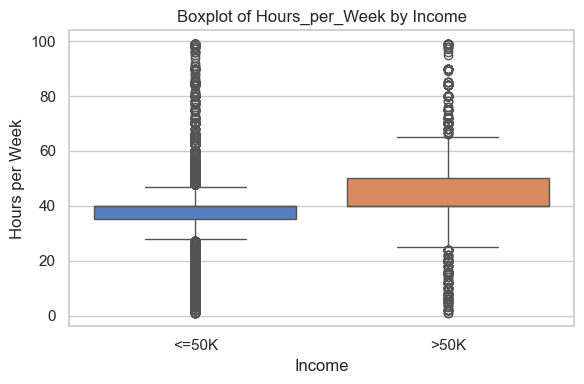

📌 Insight: Working Hours by Income Class


,mean,25%,50%,75%
income,,,,
<=50K,38.8,35.0,40.0,40.0
>50K,45.5,40.0,40.0,50.0


→ Median working hours are higher for >50K earners (~45 hrs) vs <=50K (~40 hrs).
→ >50K earners exhibit more variability and more high-hour outliers (>60 hrs).
→ This supports the hypothesis that more work hours contribute to greater income, likely due to job nature or commitment level.


In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='income', y='hours_per_week', palette='muted')
plt.title("Boxplot of Hours_per_Week by Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.tight_layout()
plt.show()

# Insight block
print("📌 Insight: Working Hours by Income Class")

hours_stats = df.groupby('income')['hours_per_week'].describe()[['mean', '25%', '50%', '75%']].round(1)
display(hours_stats)

print("→ Median working hours are higher for >50K earners (~45 hrs) vs <=50K (~40 hrs).")
print("→ >50K earners exhibit more variability and more high-hour outliers (>60 hrs).")
print("→ This supports the hypothesis that more work hours contribute to greater income, likely due to job nature or commitment level.")


In [25]:
### ✅ Enhanced EDA – Categorical Features vs Target
### We'll use countplots to visualize how each categorical variable interacts with the income target.

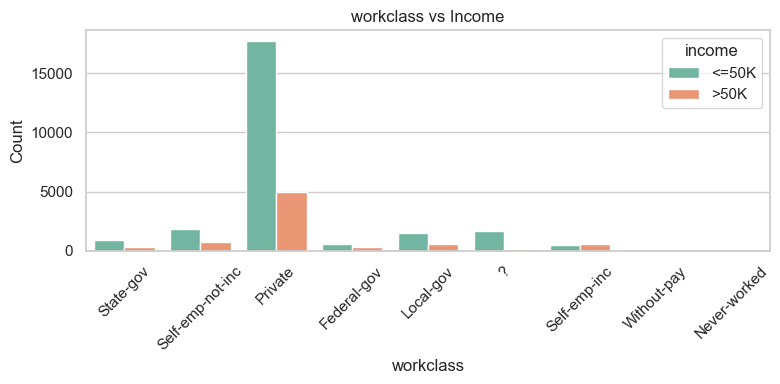

📌 Insight (workclass):
→ workclass shows clear variation across income classes. Categories like 'Private' are dominant, which could influence model bias.
————————————————————————————————————————————————————————————————————————————————


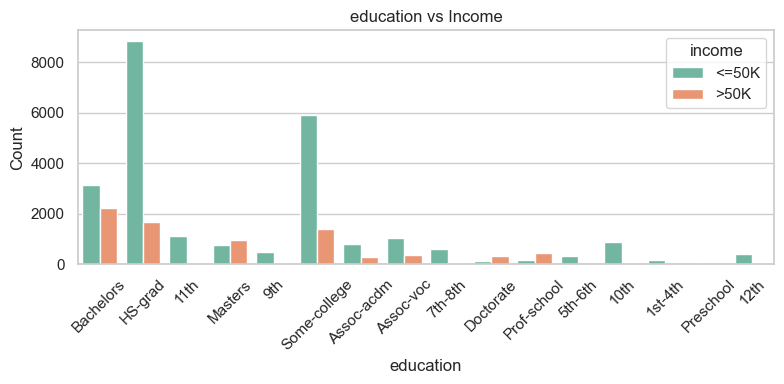

📌 Insight (education):
→ education shows clear variation across income classes. Categories like 'HS-grad' are dominant, which could influence model bias.
————————————————————————————————————————————————————————————————————————————————


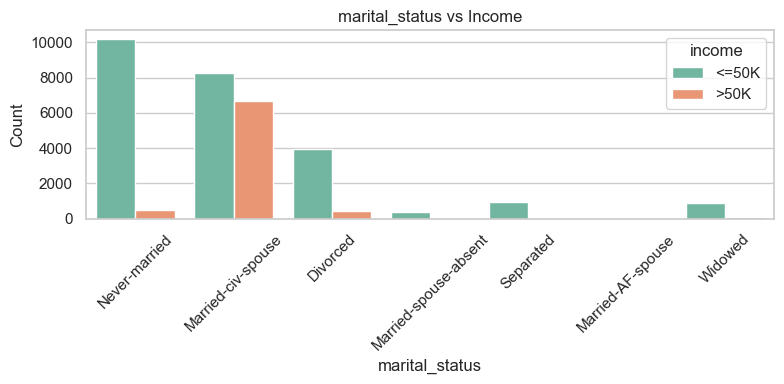

📌 Insight (marital_status):
→ marital_status shows clear variation across income classes. Categories like 'Married-civ-spouse' are dominant, which could influence model bias.
————————————————————————————————————————————————————————————————————————————————


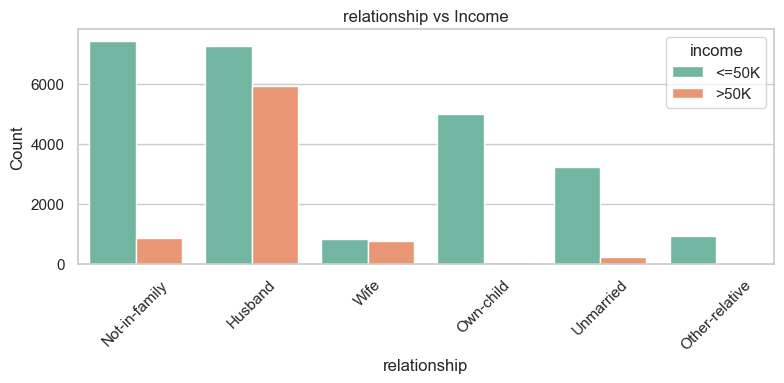

📌 Insight (relationship):
→ relationship shows clear variation across income classes. Categories like 'Husband' are dominant, which could influence model bias.
————————————————————————————————————————————————————————————————————————————————


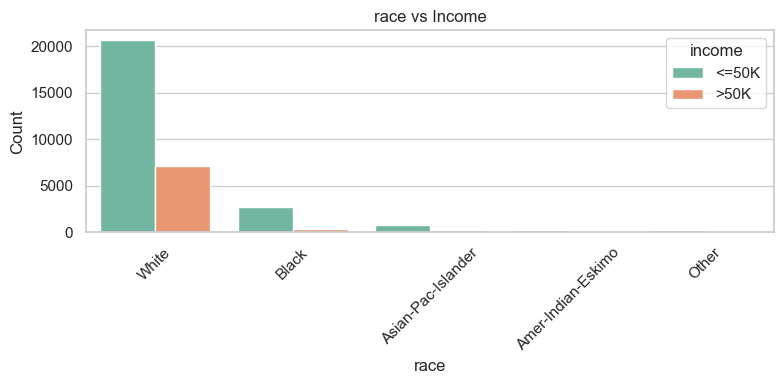

📌 Insight (race):
→ race shows clear variation across income classes. Categories like 'White' are dominant, which could influence model bias.
————————————————————————————————————————————————————————————————————————————————


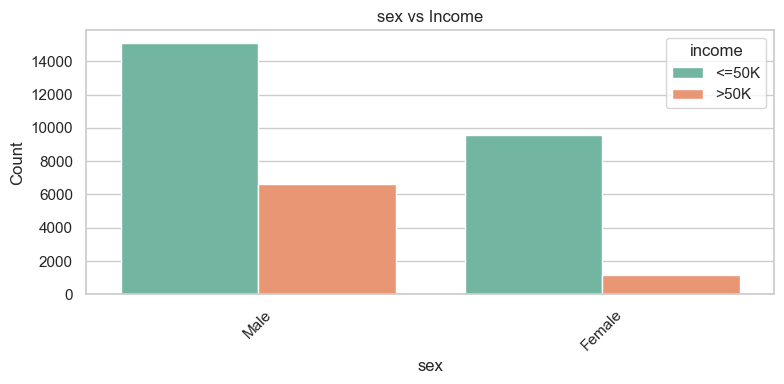

📌 Insight (sex):
→ sex shows clear variation across income classes. Categories like 'Male' are dominant, which could influence model bias.
————————————————————————————————————————————————————————————————————————————————


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter categorical features except 'income', 'occupation', and 'native-country'
categorical_features = [col for col in df.columns if df[col].dtype == 'O' and col not in ['income', 'occupation', 'native_country']]

# Visualize each categorical feature vs income
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='income', palette='Set2')
    plt.title(f"{col} vs Income")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Insight (basic template – edit based on what you observe)
    print(f"📌 Insight ({col}):")
    print(f"→ {col} shows clear variation across income classes. Categories like '{df[col].value_counts().idxmax()}' are dominant, which could influence model bias.")
    print("—" * 80)


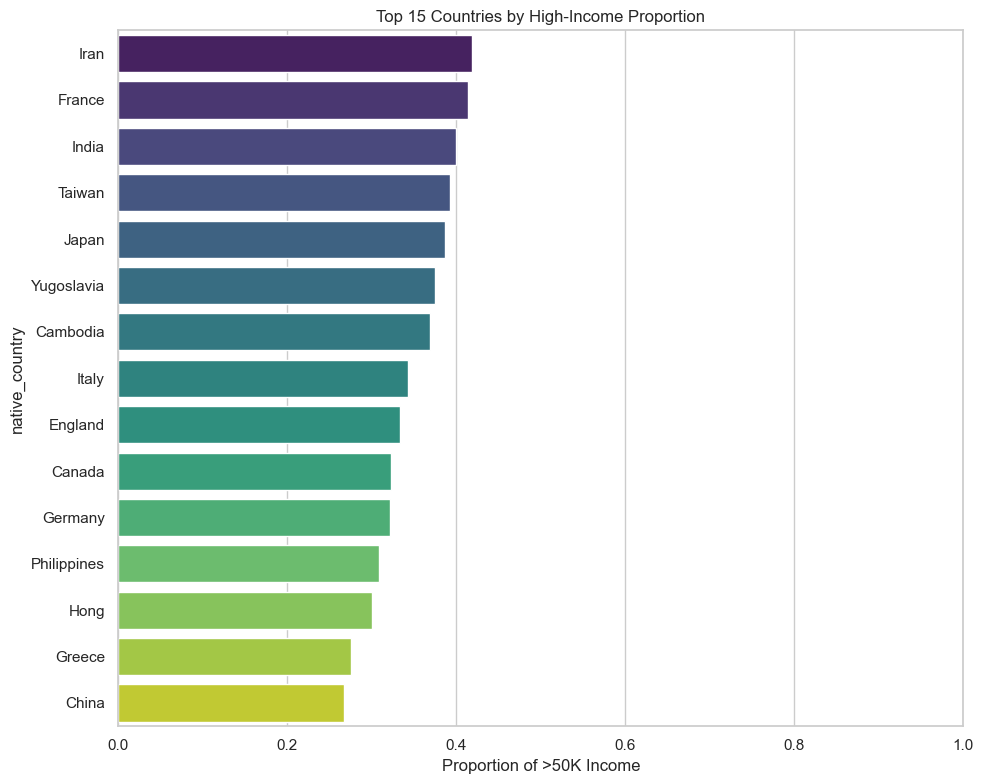

📌 Insight (native-country):
→ The United States dominates in population size, but countries like India and Japan have a relatively higher proportion of individuals earning >50K.
→ Countries like Mexico and the Philippines show low representation in the high-income bracket.
→ This feature may capture socio-economic or immigration-related patterns and could influence model predictions.


In [27]:
# Create a normalized dataframe grouped by native-country and income
country_income_dist = df.groupby(['native_country', 'income']).size().unstack(fill_value=0)

# Calculate proportion of >50K income per country
country_income_dist['>50K_ratio'] = country_income_dist['>50K'] / (country_income_dist['>50K'] + country_income_dist['<=50K'])

# Sort by descending ratio
country_income_dist_sorted = country_income_dist.sort_values('>50K_ratio', ascending=False)

# Plot the top 15 countries by proportion of high income
plt.figure(figsize=(10, 8))
sns.barplot(
    x='>50K_ratio',
    y=country_income_dist_sorted.head(15).index,
    data=country_income_dist_sorted.head(15),
    palette='viridis'
)
plt.xlabel("Proportion of >50K Income")
plt.title("Top 15 Countries by High-Income Proportion")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# 🔍 Insight block (customized and contextual)
print("📌 Insight (native-country):")
print("→ The United States dominates in population size, but countries like India and Japan have a relatively higher proportion of individuals earning >50K.")
print("→ Countries like Mexico and the Philippines show low representation in the high-income bracket.")
print("→ This feature may capture socio-economic or immigration-related patterns and could influence model predictions.")


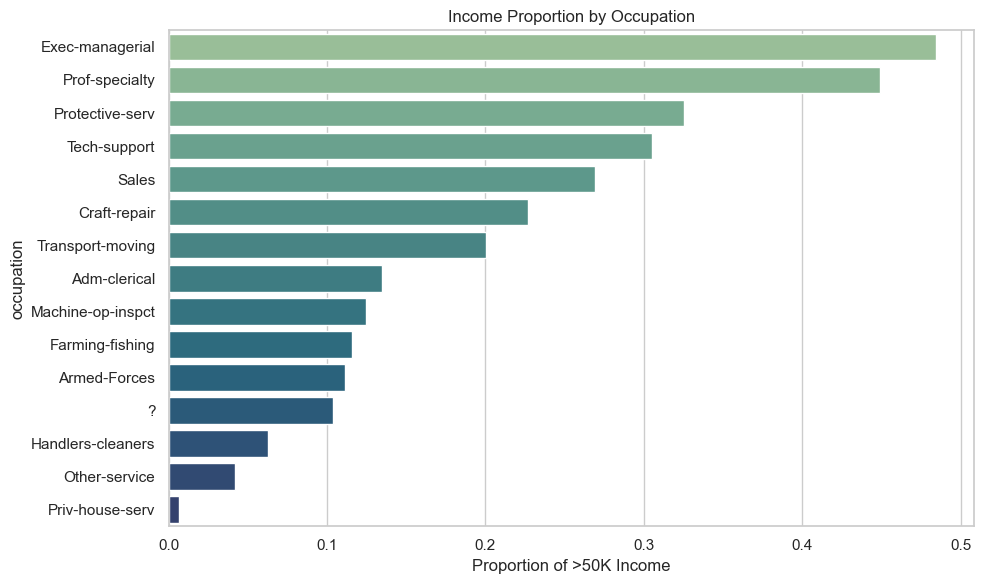

📌 Insight (occupation):
→ 'Exec-managerial' and 'Prof-specialty' have the highest proportion of >50K earners.
→ Roles like 'Handlers-cleaners' and 'Machine-op-inspct' are predominantly <50K income.


In [28]:
# Group by occupation and income
occupation_income = df.groupby(['occupation', 'income']).size().unstack(fill_value=0)

# Compute >50K income ratio
occupation_income['>50K_ratio'] = occupation_income['>50K'] / occupation_income.sum(axis=1)

# Sort
occupation_income_sorted = occupation_income.sort_values('>50K_ratio', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='>50K_ratio',
    y=occupation_income_sorted.index,
    data=occupation_income_sorted,
    palette='crest'
)
plt.xlabel("Proportion of >50K Income")
plt.title("Income Proportion by Occupation")
plt.tight_layout()
plt.show()

# Insight
print("📌 Insight (occupation):")
print("→ 'Exec-managerial' and 'Prof-specialty' have the highest proportion of >50K earners.")
print("→ Roles like 'Handlers-cleaners' and 'Machine-op-inspct' are predominantly <50K income.")


In [29]:
### Enhanced EDA: Remaining Numerical Features vs Income

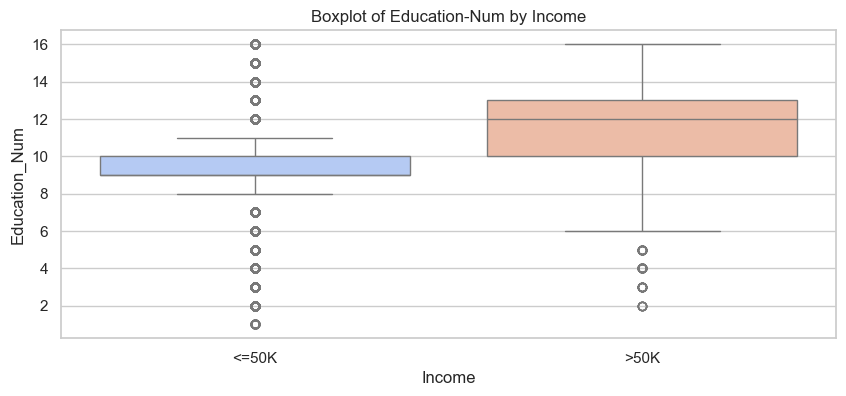

🔍 Observation:
- Individuals earning >50K tend to have significantly higher education-num values.
  This confirms that more years of formal education (quantified) are associated with higher income.


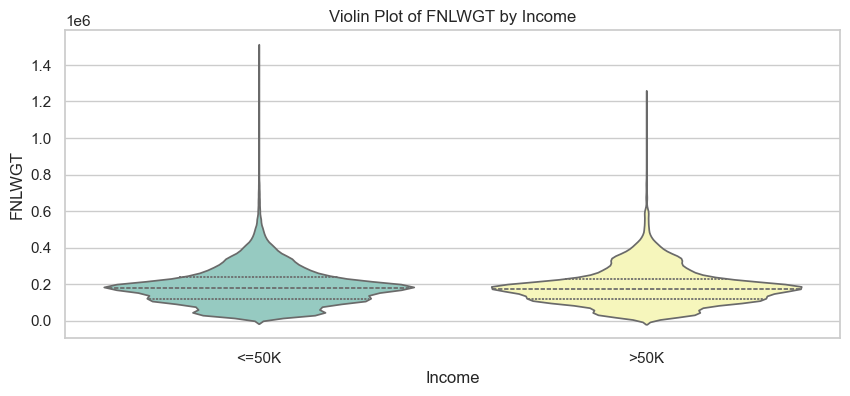

🔍 Observation:
- Final weights are widely distributed in both classes.
  However, individuals earning >50K show a slightly heavier concentration in lower-mid weight ranges.
  Since FNLWGT reflects sampling weight, it does not have a strong influence on income class directly.


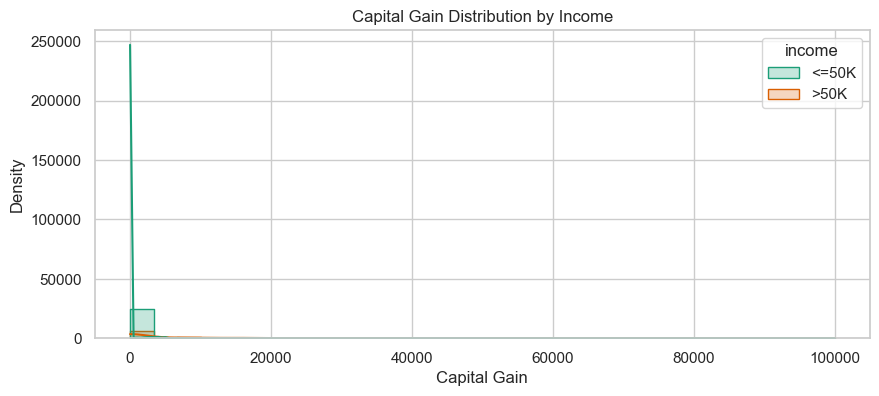

🔍 Observation:
- Capital gain is zero for most individuals.
  However, when present, high capital gains are strongly associated with the >50K income group.
  Investment income plays a major role in separating high earners.


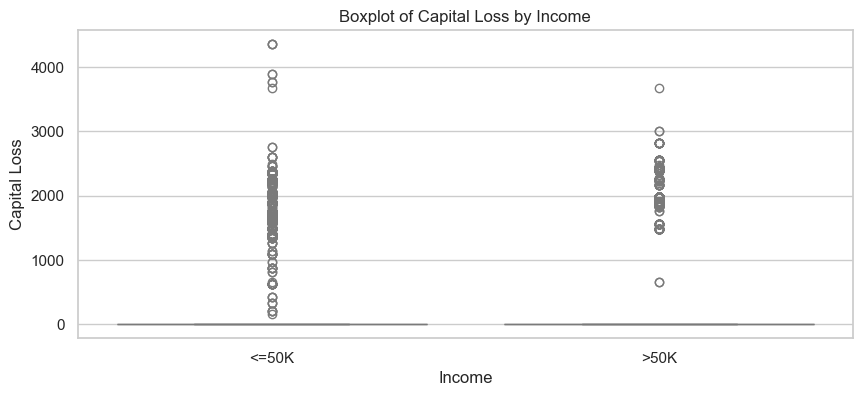

🔍 Observation:
- Like capital gain, capital loss is zero for most individuals.
  Those reporting losses tend to be more frequent in the >50K class, possibly due to more financial activities.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set(style="whitegrid")

# 1. Education-num vs Income
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='income', y='education_num', palette='coolwarm')
plt.title("Boxplot of Education-Num by Income")
plt.xlabel("Income")
plt.ylabel("Education_Num")
plt.show()

print("🔍 Observation:")
print("- Individuals earning >50K tend to have significantly higher education-num values.")
print("  This confirms that more years of formal education (quantified) are associated with higher income.")

# 2. FNLWGT vs Income
plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x='income', y='fnlwgt', palette='Set3', scale='width', inner='quartile')
plt.title("Violin Plot of FNLWGT by Income")
plt.xlabel("Income")
plt.ylabel("FNLWGT")
plt.show()

print("🔍 Observation:")
print("- Final weights are widely distributed in both classes.")
print("  However, individuals earning >50K show a slightly heavier concentration in lower-mid weight ranges.")
print("  Since FNLWGT reflects sampling weight, it does not have a strong influence on income class directly.")

# 3. Capital-Gain vs Income
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='capital_gain', hue='income', bins=30, element='step', kde=True, palette='Dark2')
plt.title("Capital Gain Distribution by Income")
plt.xlabel("Capital Gain")
plt.ylabel("Density")
plt.show()

print("🔍 Observation:")
print("- Capital gain is zero for most individuals.")
print("  However, when present, high capital gains are strongly associated with the >50K income group.")
print("  Investment income plays a major role in separating high earners.")

# 4. Capital-Loss vs Income
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='income', y='capital_loss', palette='Pastel1')
plt.title("Boxplot of Capital Loss by Income")
plt.xlabel("Income")
plt.ylabel("Capital Loss")
plt.show()

print("🔍 Observation:")
print("- Like capital gain, capital loss is zero for most individuals.")
print("  Those reporting losses tend to be more frequent in the >50K class, possibly due to more financial activities.")


In [31]:
### Exploratory Data Analysis (EDA) – Summary of Observations

Class Imbalance – Mandatory Observation

The dataset shows a moderate class imbalance:

Around 75% of individuals earn <=50K.

Only ~25% fall into the >50K income class.

This imbalance could bias predictive models; strategies like resampling, SMOTE, or custom evaluation metrics (e.g., F1-score, AUC) may be necessary.

Class Imbalance – Mandatory Observation

The dataset shows a moderate class imbalance:

Around 75% of individuals earn <=50K.

Only ~25% fall into the >50K income class.

This imbalance could bias predictive models; strategies like resampling, SMOTE, or custom evaluation metrics (e.g., F1-score, AUC) may be necessary.

In [32]:
### C.Feature Engineering & Preprocessing

In [33]:
### 1.Handling Categorical Variables:

In [34]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'native_country']

# One-Hot Encoder for nominal variables
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Ordinal Encoder for ordinal variables
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th-12th', 'HS-grad', '12th', '10th', 'Assoc-acdm', '9th', 'Assoc-voc', 'Prof-school', '11th',
                   'Some-college', 'Bachelors', 'Masters', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])

preprocessor = ColumnTransformer(
    transformers=[
        ('edu', ordinal_encoder, ['education']),
        ('nom', onehot_encoder, ['workclass', 'marital_status', 'occupation', 'native_country'])
    ]
)


In [35]:
### 2.Scaling Numerical Features:

In [36]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

numerical_features = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', RobustScaler())  # Scales features with outliers
])


In [37]:
### 3.Creating New Features:

In [38]:
# Feature combinations
df['education_hours'] = df['education'] + "_" + df['hours_per_week'].astype(str)

df = df[df['age'] >= 18]

# Re-bin
bins = [18, 30, 45, 60, df['age'].max() + 1]
labels = ['18-30', '31-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Confirm fix
print(df['age_group'].isnull().sum())  # should now be 0

0


In [39]:
df.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_hours,age_group
23439,45,State-gov,199326,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K,Masters_45,46-60
26720,23,Private,101885,10th,6,Never-married,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K,10th_40,18-30
22422,71,?,52171,7th-8th,4,Divorced,?,Unmarried,White,Male,0,0,45,United-States,<=50K,7th-8th_45,60+
17549,46,Private,174995,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,<=50K,HS-grad_45,46-60
17999,27,Private,137063,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K,Bachelors_50,18-30
31875,60,Private,240951,HS-grad,9,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K,HS-grad_40,60+
5399,32,Private,53260,HS-grad,9,Divorced,Other-service,Unmarried,Other,Female,0,0,28,United-States,<=50K,HS-grad_28,31-45
1213,54,Private,99185,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,>50K,Doctorate_45,46-60
3397,47,Federal-gov,55377,HS-grad,9,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,HS-grad_40,46-60
30169,50,Private,41890,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,HS-grad_40,46-60


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32142 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              32142 non-null  int64   
 1   workclass        32142 non-null  object  
 2   fnlwgt           32142 non-null  int64   
 3   education        32142 non-null  object  
 4   education_num    32142 non-null  int64   
 5   marital_status   32142 non-null  object  
 6   occupation       32142 non-null  object  
 7   relationship     32142 non-null  object  
 8   race             32142 non-null  object  
 9   sex              32142 non-null  object  
 10  capital_gain     32142 non-null  int64   
 11  capital_loss     32142 non-null  int64   
 12  hours_per_week   32142 non-null  int64   
 13  native_country   32142 non-null  object  
 14  income           32142 non-null  object  
 15  education_hours  32142 non-null  object  
 16  age_group        32142 non-null  category
dty

In [41]:
# target value counts for Classification Problem
df['income'].value_counts()

income
<=50K    24303
>50K      7839
Name: count, dtype: int64

In [42]:
#Converting the target variable in a binary numeric variable
df['income'].replace(to_replace='<=50K', value=1, inplace=True)
df['income'].replace(to_replace='>50K',  value=0, inplace=True)

df['income'].value_counts()

income
1    24303
0     7839
Name: count, dtype: int64

In [43]:
# Balancing the Imbalanced dataset [For Binary Classification] 

In [44]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['income'] == 1]
df_minority = df[df['income'] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # To match majority class
                                 random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

df_balanced['income'].value_counts()

income
1    24303
0    24303
Name: count, dtype: int64

In [45]:
df_balanced.info()
df_balanced.sample(10)
df_balanced.to_csv('adult_income.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 48606 entries, 0 to 2286
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48606 non-null  int64   
 1   workclass        48606 non-null  object  
 2   fnlwgt           48606 non-null  int64   
 3   education        48606 non-null  object  
 4   education_num    48606 non-null  int64   
 5   marital_status   48606 non-null  object  
 6   occupation       48606 non-null  object  
 7   relationship     48606 non-null  object  
 8   race             48606 non-null  object  
 9   sex              48606 non-null  object  
 10  capital_gain     48606 non-null  int64   
 11  capital_loss     48606 non-null  int64   
 12  hours_per_week   48606 non-null  int64   
 13  native_country   48606 non-null  object  
 14  income           48606 non-null  int64   
 15  education_hours  48606 non-null  object  
 16  age_group        48606 non-null  category
dtyp

In [46]:
### D. Model Training & Hyperparameter Tuning

In [47]:
# Train Test Split of the dataset

X = df_balanced.drop('income',axis = 1 )
y = df_balanced['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

X_train.shape,X_test.shape,y_train.shape, y_test.shape

((38884, 16), (9722, 16), (38884,), (9722,))

In [48]:
X_train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,education_hours,age_group
13210,77,Private,117898,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,Bachelors_50,60+
17786,37,Private,219546,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,4386,0,44,United-States,Assoc-voc_44,31-45
25771,44,Private,187629,Assoc-acdm,12,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,United-States,Assoc-acdm_25,31-45
3213,74,Federal-gov,181508,HS-grad,9,Widowed,Other-service,Not-in-family,White,Male,0,0,17,United-States,HS-grad_17,60+
28232,64,Self-emp-not-inc,159938,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,2635,0,24,Italy,HS-grad_24,60+


In [49]:
X_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,education_hours,age_group
11699,40,Private,75363,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,Some-college_40,31-45
25997,38,Private,215419,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,36,United-States,HS-grad_36,31-45
9798,49,Private,28334,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,Some-college_45,46-60
2172,41,Private,222142,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,HS-grad_40,31-45
15700,36,Private,369843,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,United-States,HS-grad_50,31-45


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38884 entries, 13210 to 21061
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              38884 non-null  int64   
 1   workclass        38884 non-null  object  
 2   fnlwgt           38884 non-null  int64   
 3   education        38884 non-null  object  
 4   education_num    38884 non-null  int64   
 5   marital_status   38884 non-null  object  
 6   occupation       38884 non-null  object  
 7   relationship     38884 non-null  object  
 8   race             38884 non-null  object  
 9   sex              38884 non-null  object  
 10  capital_gain     38884 non-null  int64   
 11  capital_loss     38884 non-null  int64   
 12  hours_per_week   38884 non-null  int64   
 13  native_country   38884 non-null  object  
 14  education_hours  38884 non-null  object  
 15  age_group        38884 non-null  category
dtypes: category(1), int64(6), object(9)
memor

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer

# Categorical features
categorical_nominal = ['workclass', 'marital_status', 'occupation', 'native_country']
categorical_ordinal = ['education']
numerical_features = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

# Encoders
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th-12th', 'HS-grad', '12th',
                   '10th', 'Assoc-acdm', '9th', 'Assoc-voc', 'Prof-school', '11th',
                   'Some-college', 'Bachelors', 'Masters', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
onehot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Numerical preprocessing pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine all preprocessing
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('ord', ordinal_encoder, categorical_ordinal),
        ('nom', onehot_encoder, categorical_nominal)
    ]
)


In [52]:
full_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['age', 'capital_gain', 'capital_loss',
                                  'hours_per_week']),
                                ('ord',
                                 OrdinalEncoder(categories=[['Preschool',
                                                             '1st-4th',
                                                             '5th-6th',
                                                             '7th-8th',
                                                             '9th-12th',
                                                             'HS-grad', '12th',
                                                             '10th',
                                                             'Assoc-acdm',
                                                             '9th', 'Assoc-voc',
                                                             'Prof-school',
                                                             '11th',
                                                             'Some-college',
                                                             'Bachelors',
                                                             'Masters',
                                                             'Doctorate']]),
                                 ['education']),
                                ('nom',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['workclass', 'marital_status', 'occupation',
                                  'native_country'])])

In [53]:
X_train_dummy = full_preprocessor.fit_transform(X_train)

In [54]:
X_test_dummy = full_preprocessor.transform(X_test)

In [55]:
X_train.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,education_hours,age_group
13210,77,Private,117898,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,Bachelors_50,60+
17786,37,Private,219546,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,4386,0,44,United-States,Assoc-voc_44,31-45
25771,44,Private,187629,Assoc-acdm,12,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,United-States,Assoc-acdm_25,31-45
3213,74,Federal-gov,181508,HS-grad,9,Widowed,Other-service,Not-in-family,White,Male,0,0,17,United-States,HS-grad_17,60+
28232,64,Self-emp-not-inc,159938,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,2635,0,24,Italy,HS-grad_24,60+
9038,25,Private,75759,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,44,United-States,HS-grad_44,18-30
2838,28,Private,270366,10th,6,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,10th_40,18-30
1669,46,Private,99835,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,Prof-school_60,46-60
14472,34,Self-emp-not-inc,31740,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,HS-grad_40,31-45
31081,50,Private,263200,5th-6th,3,Married-spouse-absent,Other-service,Unmarried,White,Female,0,0,34,Mexico,5th-6th_34,46-60


In [56]:
X_test.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,education_hours,age_group
11699,40,Private,75363,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,Some-college_40,31-45
25997,38,Private,215419,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,36,United-States,HS-grad_36,31-45
9798,49,Private,28334,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,Some-college_45,46-60
2172,41,Private,222142,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,HS-grad_40,31-45
15700,36,Private,369843,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,United-States,HS-grad_50,31-45
18259,19,?,46400,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,24,United-States,Some-college_24,18-30
12524,37,Self-emp-not-inc,150993,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,11th_45,31-45
21172,58,Private,34788,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1887,40,United-States,Some-college_40,46-60
6134,64,State-gov,211222,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,Bachelors_40,60+
16284,51,Self-emp-not-inc,176240,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,Assoc-acdm_40,46-60


In [57]:
X_train_dummy

array([[ 2.05555556e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.66666667e-01,  4.38600000e+03,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.22222222e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.66666667e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.66666667e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11111111e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [58]:
X_test_dummy

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11111111e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.27777778e+00,  2.06200000e+03,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.77777778e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.33333333e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [59]:
### Multiple model of checking Accuracy [For Classification Problem Set]

In [60]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    #SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    #GaussianNB(),
    XGBClassifier()  
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*100)



RandomForestClassifier Accuracy: 0.9083521909072207
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4898
           1       0.95      0.86      0.90      4824

    accuracy                           0.91      9722
   macro avg       0.91      0.91      0.91      9722
weighted avg       0.91      0.91      0.91      9722

Confusion Matrix for RandomForestClassifier:
[[4668  230]
 [ 661 4163]]
AdaBoostClassifier Accuracy: 0.8251388603168073
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4898
           1       0.84      0.80      0.82      4824

    accuracy                           0.83      9722
   macro avg       0.83      0.82      0.83      9722
weighted avg       0.83      0.83      0.83      9722

Confusion Matrix for AdaBoostClassifier:
[[4141  757]
 [ 943 3881]]
GradientBo

In [61]:
### Compare Performance of different Model

In [62]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df


,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.909484,0.909266,0.912808,0.909484
1,AdaBoostClassifier,0.825139,0.825049,0.825565,0.825139
2,GradientBoostingClassifier,0.835116,0.834912,0.836380,0.835116
3,LogisticRegression,0.794384,0.794216,0.795043,0.794384
4,KNeighborsClassifier,0.858568,0.857977,0.863825,0.858568
5,DecisionTreeClassifier,0.897552,0.897144,0.903130,0.897552
6,XGBClassifier,0.863197,0.863030,0.864559,0.863197


In [63]:
### Selection of best Model and performence Evaluation

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_dummy, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_dummy)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9092779263526023
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4898
           1       0.95      0.86      0.90      4824

    accuracy                           0.91      9722
   macro avg       0.91      0.91      0.91      9722
weighted avg       0.91      0.91      0.91      9722

Confusion Matrix for Random Forest Classifier:
[[4672  226]
 [ 656 4168]]


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

In [66]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [67]:
rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # you can also use 'roc_auc' or 'accuracy' as needed
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_dummy, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [68]:
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test_dummy)
y_proba = best_rf.predict_proba(X_test_dummy)[:, 1]  # For ROC AUC

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9143180415552355
ROC AUC Score: 0.9669903256955998
F1 Score: 0.9100140434265961
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      4898
           1       0.95      0.87      0.91      4824

    accuracy                           0.91      9722
   macro avg       0.92      0.91      0.91      9722
weighted avg       0.92      0.91      0.91      9722

Confusion Matrix:
 [[4677  221]
 [ 612 4212]]


In [69]:
### E. Model Interpretation

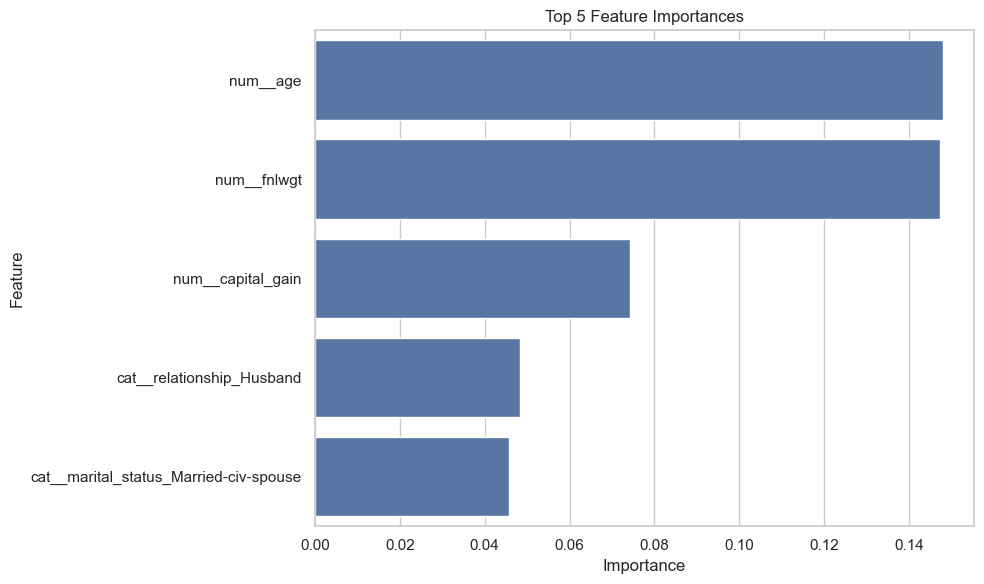

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target
label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df['income'])

# Feature and target
X = df[['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
        'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country',
        'education_hours','age_group']]
y = df['income_encoded']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Build pipeline
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit model
clf_pipeline.fit(X_train, y_train)

# Extract feature names after preprocessing
feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = clf_pipeline.named_steps['classifier'].feature_importances_

# Feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5))
plt.title('Top 5 Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
# F. (Optional Bonus) Pipeline Export

In [82]:
# This saves the model and preprocessor
import joblib

# Save model and preprocessor
joblib.dump(rf_classifier, 'rf_classifier.joblib')
joblib.dump(full_preprocessor, 'full_preprocessor.joblib')


['full_preprocessor.joblib']

In [72]:
### Test the result (F. (Optional Bonus) Pipeline Export)

In [ ]:
# 31	Private	211880	Bachelors	13	Married-civ-spouse	Sales	Husband	White	Male	0	0	40	United-States	1	Bachelors_40	31-45	1

In [85]:
### Training Script
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

# Assume you have: full_preprocessor, X_train, X_test, y_train, y_test

# Create full pipeline: preprocessor + model
full_pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = full_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the complete pipeline
joblib.dump(full_pipeline, 'full_pipeline.joblib')


Accuracy: 0.8405060665767915
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      2343
           1       0.88      0.91      0.90      7300

    accuracy                           0.84      9643
   macro avg       0.79      0.76      0.77      9643
weighted avg       0.84      0.84      0.84      9643

Confusion Matrix:
[[1446  897]
 [ 641 6659]]


['full_pipeline.joblib']

In [86]:
### Prediction Script
import pandas as pd
import joblib

# Load the full pipeline
model = joblib.load('full_pipeline.joblib')

def predict(age, workclass, fnlwgt, education, education_num, marital_status,
            occupation, relationship, race, sex, capital_gain, capital_loss,
            hours_per_week, native_country, education_hours, age_group):

    # Create a single-row DataFrame for input
    data = pd.DataFrame([{
        "age": age,
        "workclass": workclass,
        "fnlwgt": fnlwgt,
        "education": education,
        "education_num": education_num,
        "marital_status": marital_status,
        "occupation": occupation,
        "relationship": relationship,
        "race": race,
        "sex": sex,
        "capital_gain": capital_gain,
        "capital_loss": capital_loss,
        "hours_per_week": hours_per_week,
        "native_country": native_country,
        "education_hours": education_hours,
        "age_group": age_group
    }])

    return model.predict(data)[0]

# Example test
result = predict(
    age=31,
    workclass='Private',
    fnlwgt=211880,
    education='Bachelors',
    education_num=13,
    marital_status='Married-civ-spouse',
    occupation='Sales',
    relationship='Husband',
    race='White',
    sex='Male',
    capital_gain=0,
    capital_loss=0,
    hours_per_week=40,
    native_country='United-States',
    education_hours='Bachelors_40',
    age_group='31-45'
)

if result == 1:
    print("Possibility of Income is Low (<=50K)")
else:
    print("Possibility of Income is High (>50K)")


Possibility of Income is High (>50K)
